# Learning outcomes
- image histogram
- histogram equalization and CLAHE(improved version of histogram equaliation)
- thresholding
    - Global thresholding
    - Otsu thresholding
- color spaces (RGB, L\*a\*b, HSV)
- demo on color based segmentation

### setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

## Image histogram

In [2]:
img = cv.imread("images/lena.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [3]:
# 2 ways to compute histogram
%timeit hist = cv.calcHist([gray], [0], None, [256], [0, 256])
%timeit hist, _ = np.histogram(gray.flatten(), 256)

53.1 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
2.37 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


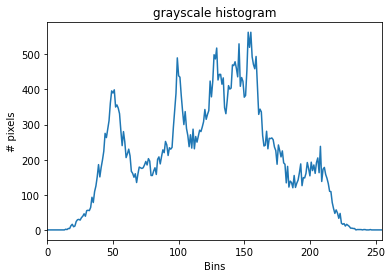

In [4]:
# plot the histogram

hist = cv.calcHist([gray], [0], None, [256], [0, 256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.plot(hist)
plt.xlim([0, 255])
plt.show()

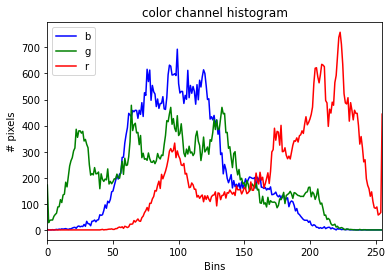

In [5]:
# for each channel
channels = cv.split(img)
colors = ('b', 'g', 'r')

plt.figure()
plt.title("color channel histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")

for ch, color in zip(channels, colors):
    hist = cv.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color, label = color)
    
plt.xlim([0, 255])
plt.legend()
plt.show()

In [6]:
img = cv.imread("images/low_contrast_img.jfif", 0)
show_img("low contrast", img)

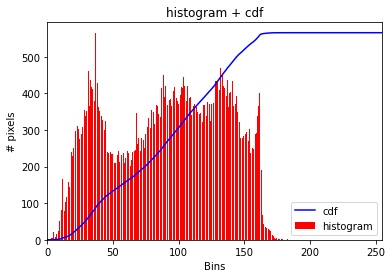

In [7]:
# histogram equalization
hist = cv.calcHist([img], [0], None, [256], [0, 256])

# cdf(cummulative distribution function)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

#
plt.figure()
plt.plot(cdf_normalized, color= "b")
plt.hist(img.flatten(), 256, color = "r")
plt.title("histogram + cdf")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.xlim([0, 255])
plt.legend(("cdf", "histogram"))
plt.show()

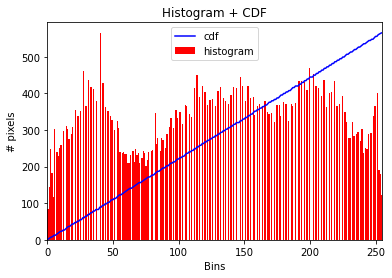

In [8]:
# equalization
eq = cv.equalizeHist(img)

# histogram equalization
hist = cv.calcHist([eq], [0], None, [256], [0, 256])

# cdf
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

#
plt.figure()
plt.plot(cdf_normalized, color='b')
plt.hist(eq.flatten(), 256, color='r')
plt.title("Histogram + CDF")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.xlim([0, 255])
plt.legend(("cdf", "histogram"))
plt.show()

In [9]:
cv.imshow("original", img)
show_img("histogram equalization", eq)

## CLAHE

In [10]:
img = cv.imread("images/dog1.jfif", 0)

#equalization

eq = cv.equalizeHist(img)

#CLAHE
clahe = cv.createCLAHE(clipLimit = 3, tileGridSize = (8, 8))
dst = clahe. apply(img)

cv.imshow("original", img)
cv.imshow("equalization", eq)
show_img("CLAHE", dst)



### Exercise 1

In [14]:
img = cv.imread("images/winter.jfif", 0)

#equalization

eq = cv.equalizeHist(img)

#CLAHE
clahe = cv.createCLAHE(clipLimit = 3, tileGridSize = (8, 8))
dst = clahe. apply(img)

cv.imshow("original", img)
cv.imshow("equalization", eq)
show_img("CLAHE", dst)

## Thresholding flags

In [11]:
[i for i in dir(cv) if i.startswith("THRESH")]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [12]:
img = np.fromfunction(lambda i, j: j, (50, 256), dtype = np.uint8)

def trackbar(x):
    _, img1 = cv.threshold(img, x, 255, cv.THRESH_BINARY)
    _, img2 = cv.threshold(img, x, 255, cv.THRESH_BINARY_INV)
    _, img3 = cv.threshold(img, x, 255, cv.THRESH_TRUNC)
    _, img4 = cv.threshold(img, x, 255, cv.THRESH_TOZERO)
    _, img5 = cv.threshold(img, x, 255, cv.THRESH_TOZERO_INV)
    
    cv.imshow("combined", np.vstack((img1, img2, img3, img4, img5)))

cv.namedWindow("combined")
cv.createTrackbar("threshold", "combined", 50, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()
        

In [13]:
img = cv.imread("images/noisy.jfif", 0)
show_img("noisy", img)

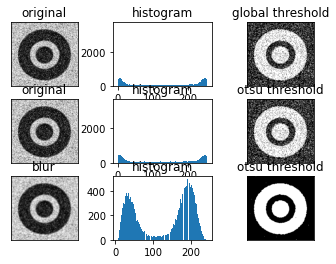

In [14]:
img = cv.imread("images/noisy.jfif", 0)

# 3 different versions of thresholding

# 1: global threshold
th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)[1]

# 2 otsu thresholding
th2 = cv.threshold(img, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY_INV)[1]

#3 GAUSSIAN blurring + otsu thresholding
blur = cv.GaussianBlur(img, (5, 5 ), 0)
th3 = cv.threshold(blur, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY_INV)[1]

imgs = [img, 0, th1, 
      img, 0, th2,
      blur, 0, th3]

titles = ("original", "histogram", "global threshold",
         "original", "histogram", "otsu threshold",
         "blur", "histogram", "otsu threshold")

for i in range(3):
    plt.subplot(3, 3, 3*i+1), plt_img(imgs[3*i], title = titles[3*i])
    plt.subplot(3, 3, 3*i+2), plt.hist(imgs[3*i].flatten(), 256)
    plt.title(titles[3*i+1])
    plt.subplot(3, 3, 3*i+3), plt_img(imgs[3*i+2], title= titles[3*i+2])

plt.show()

In [15]:
# erosion
kernel = np.ones((3, 3), dtype = np.uint8)

dst = cv.erode(th3, kernel, iterations =1)

img_combined = np.hstack((th3, dst))

show_img("erosion", img_combined)

In [16]:
# dilation
kernel = np.ones((3, 3), dtype = np.uint8)

dst = cv.dilate(th3, kernel, iterations =1)

img_combined = np.hstack((th3, dst))

show_img("dilation", img_combined)

In [18]:
# control kernel size and iterations
# closing
# set up trackbar and while loop
def trackbar(x):
    pass 

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, trackbar)
cv.createTrackbar("iter", wn, 2, 10, trackbar)

while (1):
    # retrieve the size and iterations
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1
    
    kernel = np.ones((size, size), dtype = np.uint8)
    res = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel, iterations = iteration)
    ## can change to MORPH_OPEN
    
    cv.imshow(wn, res)
    k = cv.waitKey(1) & 0xFF
    if k == 27: 
        break
        
cv.destroyAllWindows

<function destroyAllWindows>

In [19]:
cv.getStructuringElement(cv.MORPH_RECT, (5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [20]:
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

## color spaces
- RGB
- L\*a\*b, Perceptual uniformity.  (euclidean distance how our human eye perceive color, more reasonable to ???) 
- HSV: hue, saturation, value
    - hue encodes color
    - saturation is the purity of color. The higher the value, the purer
    - value is brightness

In [22]:
img = cv.imread("images/lena.jfif")

img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

l, a ,b, = cv.split(img_lab)

# sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
l_sharpened = cv.filter2D(l, -1, kernel)

# merge
sharpened = cv.merge((l_sharpened, a, b))
sharpened = cv.cvtColor(sharpened, cv.COLOR_LAB2BGR)

cv.imshow("lena", img)
show_img("sharpen", sharpened)

### Demo of color based segmentation

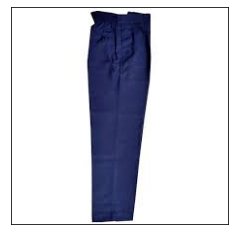

In [143]:
img = cv.imread("images/color_space/pant.jfif")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt_img(img)

In [127]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm

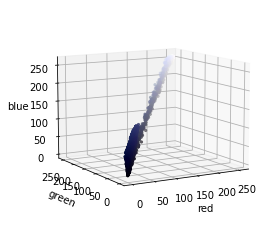

In [145]:
# visualize the pixels in 3D plots (RGB dimensional space)
r, g, b = cv.split(img)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = img.reshape((-1, 3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(), #can use flatten 
            facecolor = pixel_colors, marker = ".") 
axis.view_init(elev = 10, azim= 240)
axis.set_xlabel("red")
axis.set_ylabel("green")
axis.set_zlabel("blue")
plt.show()

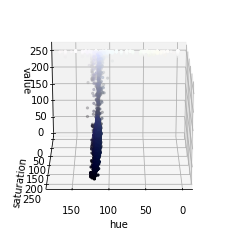

In [155]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

# visualize the pixels in 3D plots (RGB dimensional space)
h, s, v = cv.split(img_hsv)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.ravel(), s.ravel(), v.ravel(), #can use flatten 
            facecolor = pixel_colors, marker = ".") 
axis.view_init(elev = 20, azim= 90) ## change azim means change view angle

axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

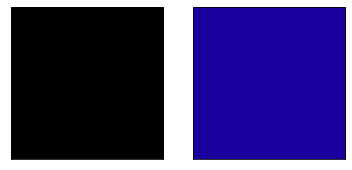

In [27]:
# visualize the low blue and high blue color
blue_low = (85, 90, 0)
blue_high = (125, 255, 160)

square1 = np.full((10, 10, 3), blue_low, dtype = np.uint8)
square2 = np.full((10, 10, 3), blue_high, dtype = np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1, cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2, cv.COLOR_HSV2RGB))

plt.show()

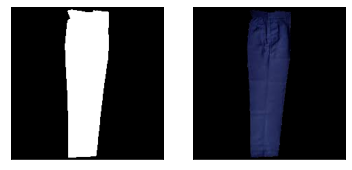

In [28]:
# color segmentation
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask=mask)

plt.subplot(121), plt_img(mask)
plt.subplot(122), plt_img(res)
plt.show()

In [29]:
def hsv(imgs):
    pass
    
    for img in imgs():
        img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

        # visualize the pixels in 3D plots (RGB dimensional space)
        h, s, v = cv.split(img_hsv)

        fig = plt.figure()
        axis = fig.add_subplot(1, 1, 1, projection = "3d")

        axis.scatter(h.ravel(), s.ravel(), v.ravel(), #can use flatten 
                    facecolor = pixel_colors, marker = ".") 
        axis.view_init(elev = 10, azim= 180) ## change azim means change view angle

        axis.set_xlabel("hue")
        axis.set_ylabel("saturation")
        axis.set_zlabel("value")
        plt.show()

In [30]:
imgs = []
for i in range(1, 6):
    img = cv.imread("images/color_space/pant" + str(i) + ".jfif")
    imgs.append(img)

In [31]:
for i in imgs:
    show_img("ye", i)

In [32]:
def color_seg(img, color_low, color_high, smooth=True):
    """Args :
    img: source image (RGB)
    color_low, color_high: HSV color tuples
    smooth=Boolean (default:True)
    """
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    #HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    #inRange
    mask = cv.inRange(img_hsv, color_low, color_high)
    # morphological operations
    mask = cv.erode(mask, None, iterations =2) ##default kernel is 3x3
    mask = cv.dilate(mask, None, iterations = 2)
    
    return cv.bitwise_and(img_ori, img_ori, mask=mask)
        
    
imgs = []
for i in range(1, 6): #1-5
    img = cv.imread(cv.samples.findFile(f"images/color_space/pant{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
    
res = [color_seg(img, blue_low, blue_high) for img in imgs]

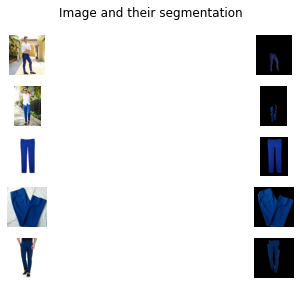

In [33]:
fig, ax = plt.subplots(5, 2, figsize =(10, 4))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis('off')
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("Image and their segmentation")    
plt.tight_layout()
plt.show()

## Exercise 1

In [298]:
boat = cv.imread("images/boat.jpg", 0)

sharpen = cv.bilateralFilter(boat, 2, 75, 400)
cv.imshow("sharpen", sharpen)

thres = cv.threshold(sharpen, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY_INV)[1]

#cv.imshow("original boat", boat)


kernel = np.ones((3,3), np.uint8)
img_dilate = cv.morphologyEx(thres, cv.MORPH_DILATE, kernel)

#show_img("otsu thresholding", thres)
#show_img("dilation", img_dilate)
#cv.waitKey(0)
#cv.destroyAllWindows

contours, hierarchy = cv.findContours(img_dilate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
img_copy = boat.copy()
#cv.drawContours(img_copy, contours, -1, (0, 0, 0), 2)

contourAreaList = []
for contour in contours:
    area = cv.contourArea(contour)
    contourAreaList.append(area)
    
x, y, w, h = cv.boundingRect(contours[contourAreaList.index(max(contourAreaList))])
cv.rectangle(img_copy, (x,y), (x+w,y+h), (255,0,0), 5)

show_img("bounding", img_copy)

## Exercise 2

In [108]:
img = cv.imread("images/leaf.jfif", 0)

#cv.imshow("leaf", img)
# 1: global threshold
th1 = cv.threshold(img, 150, 255, cv.THRESH_BINARY_INV)[1]
#show_img("thres", th1)

def trackbar(x):
    pass 

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, trackbar)
cv.createTrackbar("iter", wn, 2, 10, trackbar)

while (1):
    # retrieve the size and iterations
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1
    
    kernel = np.ones((size, size), dtype = np.uint8)
    res = cv.morphologyEx(th1, cv.MORPH_ERODE, kernel, iterations = iteration)
    res2 = cv.morphologyEx(th1, cv.MORPH_DILATE, kernel, iterations = iteration)
    res3 = cv.morphologyEx(th1, cv.MORPH_OPEN, kernel, iterations = iteration)
    res4 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel, iterations = iteration)
    ## can change to MORPH_OPEN
        
    row1 = np.concatenate((res, res2), axis = 1)
    row2 = np.concatenate((res3, res4), axis = 1)
    combine = np.concatenate((row1, row2), axis = 0)
    cv.imshow(wn, combine)
    k = cv.waitKey(1) & 0xFF
    if k == 27: 
        break
        
cv.destroyAllWindows

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'window' in function 'cvGetTrackbarPos'


## Exercise 3

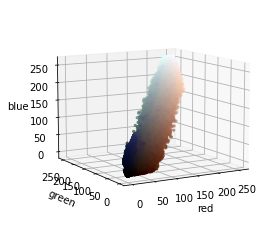

In [288]:
img = cv.imread("images/color_space/porcelain1.jfif")
# visualize the pixels in 3D plots (RGB dimensional space)
r, g, b = cv.split(img)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = img.reshape((-1, 3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(), #can use flatten 
            facecolor = pixel_colors, marker = ".") 
axis.view_init(elev = 10, azim= 240)
axis.set_xlabel("red")
axis.set_ylabel("green")
axis.set_zlabel("blue")
plt.show()

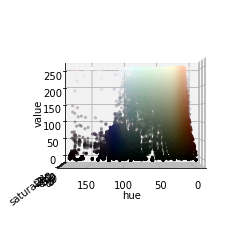

In [290]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

# visualize the pixels in 3D plots (RGB dimensional space)
h, s, v = cv.split(img_hsv)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.ravel(), s.ravel(), v.ravel(), #can use flatten 
            facecolor = pixel_colors, marker = ".") 
axis.view_init(elev = 0, azim= 90) ## change azim means change view angle

axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

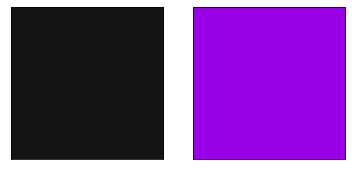

In [299]:
# visualize the low blue and high blue color
blue_low1 = (20, 0, 20)
blue_high1 = (140, 255, 230)

square1 = np.full((10, 10, 3), blue_low1, dtype = np.uint8)
square2 = np.full((10, 10, 3), blue_high1, dtype = np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1, cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2, cv.COLOR_HSV2RGB))

plt.show()

In [295]:
def color_seg(img, color_low, color_high, smooth=True):
    """Args :
    img: source image (RGB)
    color_low, color_high: HSV color tuples
    smooth=Boolean (default:True)
    """
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
        
    #HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    #inRange
    mask = cv.inRange(img_hsv, color_low, color_high)
    # morphological operations
    mask = cv.erode(mask, None, iterations =2) ##default kernel is 3x3
    mask = cv.dilate(mask, None, iterations = 2)
    
    return cv.bitwise_and(img_ori, img_ori, mask=mask)
        
    


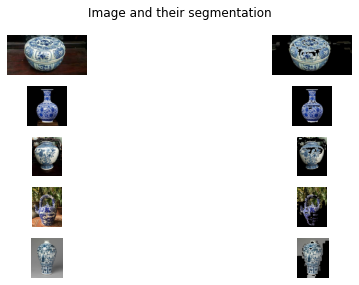

In [300]:
imgs = []
for i in range(1, 6): #1-5
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
    
res = [color_seg(img, blue_low1, blue_high1) for img in imgs]

fig, ax = plt.subplots(5, 2, figsize =(10, 4))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis('off')
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("Image and their segmentation")    
plt.tight_layout()
plt.show()